# Menyiapkan data acak

In [1]:
data = [
    79, 49, 48, 74, 81, 98, 87, 80, 80, 84, 90, 70, 91, 93, 82, 78,
    70, 71, 92, 38, 56, 81, 74, 73, 68, 72, 85, 51, 65, 93, 83, 86,
    90, 35, 83, 73, 74, 43, 86, 88, 92, 93, 76, 71, 90, 72, 67, 75,
    80, 91, 61, 72, 97, 91, 88, 81, 70, 74, 99, 95, 80, 59, 71, 77,
    63, 60, 83, 82, 60, 67, 89, 63, 76, 63, 88, 70, 66, 88, 79, 75
]

# Langkah membuat table distribusi

1. Mencari data terkecil dan terbesar

## Mencari data terkecil dan terbesar

Kita dapat menggunakan global function fungsi bawaan python, yaitu `min()` dan `max()`

In [2]:
data_terkecil = min(data)
data_terbesar = max(data)

print(f"""
Nilai terkecil : {data_terkecil}
Nilai terbesar : {data_terbesar}
""")


Nilai terkecil : 35
Nilai terbesar : 99



## Mencari banyak kelas

Untuk mencari banyak kelas kita dapat menggunakan _sturge''s rule_

$k = 1 + (3.322log (n) )$

**dimana :**

* $K$ adalah banyak kelas
* $n$ banyak data

Untuk membuat fungsi sturges, kita perlu memuat (import) modul `math` agar dapat mengakses fungsi `math.log

In [3]:
import math as m

def sturges(banyak_data):
    return round((1 + (3.3 * m.log10(banyak_data))))

In [4]:
banyak_kelas = sturges(len(data))

print(f"""
Banyak data : {len(data)}
Banyak kelas : {banyak_kelas}
""")


Banyak data : 80
Banyak kelas : 7



## Mencari panjang kelas / interval

Interval, dapat kita simbolkan dengan $p$, didapat dengan cara membagi selisih nilai terbesar dengan nilai terkecil lalu dibagi dengan banyak kelas.

$$p = \frac{(N_{max} - N_{min})}{k}$$

In [5]:
panjang_interval = m.ceil((data_terbesar - data_terkecil) / banyak_kelas)
print(f"""
Interval per kelas : {panjang_interval}
""")


Interval per kelas : 10



## Menetapkan batas bawah dan atas dari kelas pertama

Dengan mengetahui nilai terkecil dan terbesar dari kumpulan bilangan $N$ serta panjang kelas $7$ dan interval $10$, kita dapat mengambil batas bawah interval kelas pertama dengan nilai 30. Mengapa, agar interval setiap kelas terlihat lebih rapih, dengan syarat penetapan 30 batas kelas bawah dalam 7 kelas dapat memenuhi kumpulan bilangan $N$. Batas tampung lebih besar dari selisih nilai maksimal dikurang nilai minimal.

$(k \cdot p \geq N_{max} - N_{min}) \to  7 \cdot 10 \geq 99 - 35 \to 70 \geq 64$

|Kelas| Interval | 
|:---:| :-----|
|1|30 - 39|
|2|40 - 49|
|3|50 - 59|
|4|60 - 69|
|5|70 - 79|
|6|80 - 89|
|7|90 - 99|

Untuk membuat table, kita dapat menggunakan Dataframe, module dari `pandas`

# Membuat dataframe

In [6]:
from pandas import DataFrame as df
import pandas as pd

# Membuat list interval
interval_kolom = [f"{(30 ) + ((a*panjang_interval))} - {(30 + (panjang_interval*a)) + panjang_interval-1}" for a in range (banyak_kelas)]
batas_bawah_n = [(30 ) + ((a*panjang_interval)) for a in range (banyak_kelas)]
batas_atas_n = [(30 + (panjang_interval*a)) + panjang_interval-1 for a in range (banyak_kelas)]

# Transform into data frame
main_df = df({"interval":interval_kolom, "batas_bawah":batas_bawah_n,"batas_atas":batas_atas_n})
main_df

,interval,batas_bawah,batas_atas
0,30 - 39,30,39
1,40 - 49,40,49
2,50 - 59,50,59
3,60 - 69,60,69
4,70 - 79,70,79
5,80 - 89,80,89
6,90 - 99,90,99


## menambahkan frekuensi nilai dari data asli

Penggunaan _count if_ untuk menentukan banyaknya frekuensi dari setiap kelas.

In [7]:
import numpy as np
pd.set_option("display.max_colwidth", None) 
data_np = np.array(data)

In [8]:
main_df['frekuensi'] = [np.count_nonzero((data_np >= series.batas_bawah) & (data_np <= series.batas_atas)) for _,series in main_df.iterrows()]

display(main_df)

,interval,batas_bawah,batas_atas,frekuensi
0,30 - 39,30,39,2
1,40 - 49,40,49,3
2,50 - 59,50,59,3
3,60 - 69,60,69,11
4,70 - 79,70,79,24
5,80 - 89,80,89,22
6,90 - 99,90,99,15


## Membuat kolom frekuensi kumulatif lebih dari dan kurang dari

In [9]:
main_df["frekuensi_lebih_dari"] = [np.count_nonzero(data_np> series.batas_bawah) for _,series in main_df.iterrows()]
main_df["frekuensi_kurang_dari"] = [np.count_nonzero(data_np< series.batas_bawah) for _,series in main_df.iterrows()]
# main_df["frekuensi_kurang_dari_data"] = [np.sort(data_np[data_np<main_df.loc[n].batas_bawah.item()]) for n in range (banyak_kelas)]

In [10]:
main_df

,interval,batas_bawah,batas_atas,frekuensi,frekuensi_lebih_dari,frekuensi_kurang_dari
0,30 - 39,30,39,2,80,0
1,40 - 49,40,49,3,78,2
2,50 - 59,50,59,3,75,5
3,60 - 69,60,69,11,70,8
4,70 - 79,70,79,24,57,19
5,80 - 89,80,89,22,33,43
6,90 - 99,90,99,15,12,65


### Additional move, karena kurang informasi terkait nila frekuensi kurang dari akibat kekurangan 1 baris, maka kita perlu menambahkan row baru

In [11]:
# check apakah frekuensi batas bawah lebih kecil adri 
last_series_main_df = main_df.iloc[-1]
if last_series_main_df.frekuensi_kurang_dari.item() < len(data):
    
    # Jik ternyata data akhir kurang dari batas akhir tidak 
    last_index = main_df.index[-1] 

    batas_bawah_additional = last_series_main_df.batas_bawah.item() + panjang_interval # batas bawah terakhir ditambah banyak interval

    frekuensi_kurang_dari_additional = np.count_nonzero(data_np < batas_bawah_additional)
    frekuensi_lebih_dari_additional = np.count_nonzero(data_np > batas_bawah_additional)
    
    main_df.loc[last_index+1] = ['',batas_bawah_additional,0,0,frekuensi_lebih_dari_additional,frekuensi_kurang_dari_additional]
else :
    print("already sama masse")

In [12]:
main_df

,interval,batas_bawah,batas_atas,frekuensi,frekuensi_lebih_dari,frekuensi_kurang_dari
0,30 - 39,30,39,2,80,0
1,40 - 49,40,49,3,78,2
2,50 - 59,50,59,3,75,5
3,60 - 69,60,69,11,70,8
4,70 - 79,70,79,24,57,19
5,80 - 89,80,89,22,33,43
6,90 - 99,90,99,15,12,65
7,,100,0,0,0,80


## Persen kumulatif kurang dari dab lebih dari

In [13]:
main_df['persen_kumulatif_lebih_dari'] = (main_df.frekuensi_lebih_dari / len(data))
main_df['persen_kumulatif_kurang_dari'] = (main_df.frekuensi_kurang_dari / len(data))

In [14]:
main_df

,interval,batas_bawah,batas_atas,frekuensi,frekuensi_lebih_dari,frekuensi_kurang_dari,persen_kumulatif_lebih_dari,persen_kumulatif_kurang_dari
0,30 - 39,30,39,2,80,0,1.0000,0.0000
1,40 - 49,40,49,3,78,2,0.9750,0.0250
2,50 - 59,50,59,3,75,5,0.9375,0.0625
3,60 - 69,60,69,11,70,8,0.8750,0.1000
4,70 - 79,70,79,24,57,19,0.7125,0.2375
5,80 - 89,80,89,22,33,43,0.4125,0.5375
6,90 - 99,90,99,15,12,65,0.1500,0.8125
7,,100,0,0,0,80,0.0000,1.0000


# Membuat histogram

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import mplcursors

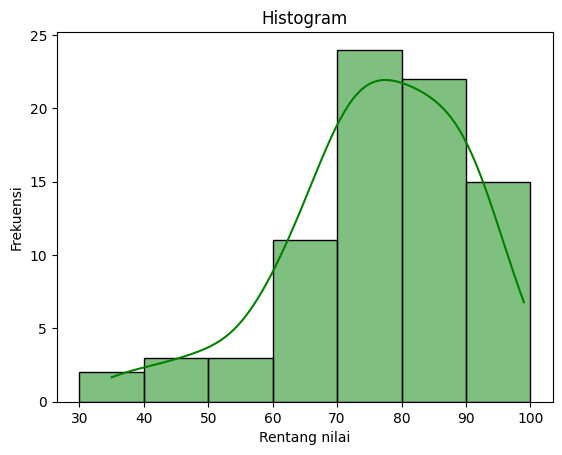

In [16]:
sns.histplot(data, bins=main_df.batas_bawah.to_numpy(), kde=True, color="green")
plt.title('Histogram')
plt.xlabel('Rentang nilai')
plt.ylabel('Frekuensi')
mplcursors.cursor(hover=True)
plt.show(sns)

## Membuat OGIF Frekuensi

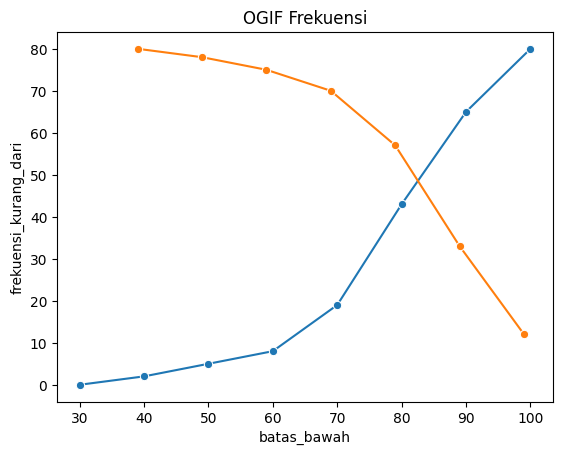

In [18]:
plt.title("OGIF Frekuensi")
ax = sns.lineplot(data=main_df, x="batas_bawah",y="frekuensi_kurang_dari",marker="o", dashes=False)
sns.lineplot(data=main_df[:-1], x="batas_atas",y="frekuensi_lebih_dari",marker="o")
plt.show(sns)